Let's start by importaing necessary packages 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [3]:
#loading real estate data set
data = pd.read_csv("Real estate valuation.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data=data.drop("No", axis=1)

In [5]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
data.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
data['X1 transaction date']

0      2012.917
1      2012.917
2      2013.583
3      2013.500
4      2012.833
         ...   
409    2013.000
410    2012.667
411    2013.250
412    2013.000
413    2013.500
Name: X1 transaction date, Length: 414, dtype: float64

In [9]:
data=data.drop('X1 transaction date', axis=1)

In [10]:
data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
data=data.drop("X5 latitude", axis=1)
data=data.drop("X6 longitude", axis=1)

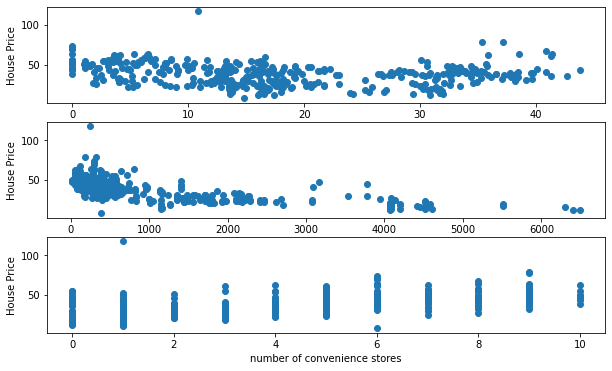

In [12]:
fig, ax = plt.subplots(3, figsize=(10, 6))
ax[0].scatter(x = data['X2 house age'], y = data['Y house price of unit area'])
ax[0].set_xlabel("House Age")
ax[0].set_ylabel("House Price")

ax[1].scatter(x = data['X3 distance to the nearest MRT station'], y = data['Y house price of unit area'])
ax[1].set_xlabel("distance to the nearest MRT station")
ax[1].set_ylabel("House Price")


ax[2].scatter(x = data['X4 number of convenience stores'], y = data['Y house price of unit area'])
ax[2].set_xlabel("number of convenience stores")
ax[2].set_ylabel("House Price")
plt.show()




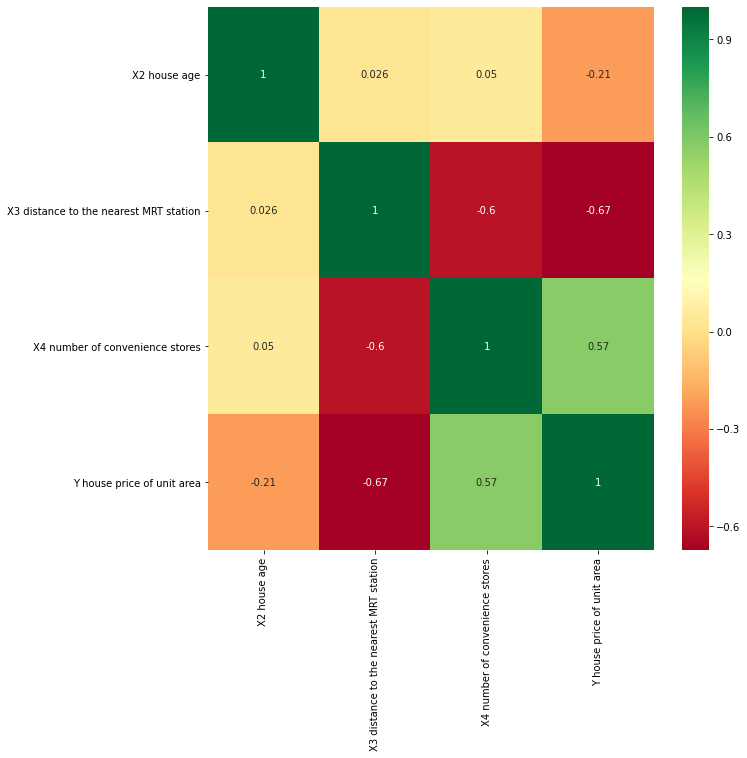

In [13]:
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True, cmap='RdYlGn' )

In [14]:
# Assigning the featurs as X and trarget as y
X= data.drop(["Y house price of unit area"],axis =1)
y= data["Y house price of unit area"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -9.245168 
DecisionTree: -9.634822 
RandomForest: -7.768442 
KNeighbors: -8.879588 
XGBRegressor: -8.652782 


In [15]:
# Since Random forest is giving best score in MSE. Let's test this model.
pred = pipeline_rf.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.6064840817943449
Adjusted R^2: 0.5946786042481753
MAE: 4.550381038059164
MSE: 44.55138913596232
RMSE: 6.674682699272102


<AxesSubplot:xlabel='Y house price of unit area'>

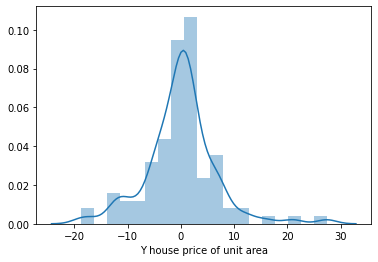

In [16]:
#Check the model performance
sns.distplot(y_test-pred)

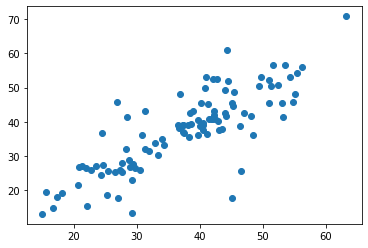

In [17]:
#Let's plot y_test and predicted values
plt.scatter(y_test, pred)

In [18]:
rf_random=RandomForestRegressor()

In [19]:
#let's do hyperparameters tuning
#Let's use Randomized CV search
#Number of trees in model
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
#Number of features to consider in every split
max_features=['auto', 'sqrt']
#Maximum levels in trees
max_depth=[int(x) for x in np.linspace(5,30, num=6)]
#minimum sample to split a node
min_samples_split=[2,5,10,15,100]
# number of sample in each leaf
min_samples_leaf=[1,2,5,10]

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
#Let's creat Random Grid
random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [22]:
#initialize random forest regressor
rf= RandomForestRegressor()


In [23]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10,
                            cv=5, verbose=2, random_state=42, n_jobs=1)

In [24]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [25]:
prediction =rf_random.predict(X_test)

In [26]:
prediction

array([70.83872517, 31.88148714, 50.57807774, 17.96154   , 29.05915   ,
       54.39078   , 15.36923333, 43.1299    , 38.7424    , 30.24407714,
       42.79227298, 40.04915   , 49.32045   , 51.48473754, 36.247025  ,
       26.37001   , 23.18543333, 37.8725    , 38.43487548, 44.17452667,
       24.2292    , 36.4851319 , 53.25282048, 19.51743333, 41.71695333,
       24.9477    , 41.3603    , 50.37474476, 38.61473929, 17.4001    ,
       56.432215  , 43.5377    , 42.598     , 58.4365    , 46.268555  ,
       48.6804044 , 33.1984    , 42.39042262, 49.34175   , 37.806     ,
       50.85338952, 26.476445  , 48.29404   , 52.34508   , 22.06734   ,
       39.67915   , 44.87408   , 40.853     , 45.3982    , 50.58361   ,
       36.775235  , 50.590755  , 34.87523333, 22.5857    , 25.6145    ,
       44.87408   , 40.1935    , 19.32339714, 46.10845333, 27.45619643,
       35.86033167, 39.58046996, 36.24697333, 42.9627    , 38.2333    ,
       28.1589    , 55.77312143, 37.01724095, 18.09767905, 24.35

In [27]:
print("R^2:",metrics.r2_score(y_test, prediction))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, prediction))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, prediction))
print("MSE:",metrics.mean_squared_error(y_test, prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R^2: 0.5764240953929913
Adjusted R^2: 0.563716818254781
MAE: 4.974591106046727
MSE: 47.954591114919
RMSE: 6.924925350855343


<AxesSubplot:xlabel='Y house price of unit area'>

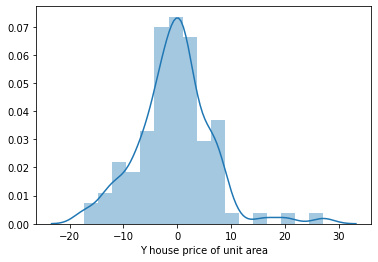

In [28]:
#Check the model performance
sns.distplot(y_test-prediction)

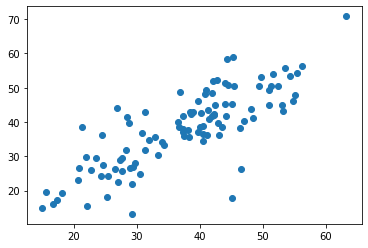

In [29]:
#Let's plot y_test and predicted values
plt.scatter(y_test, prediction)

In [37]:
#save the model
import pickle
#Let's save the model in a file
file=open('random_forest_regression_model_realestate.pkl', 'wb')# wb=write byte mode

#Dump this file 
pickle.dump(rf_random, file)

In [38]:
model=pickle.load(open('random_forest_regression_model_realestate.pkl', 'rb'))

In [39]:
X_test

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
258,0.0,292.9978,6
109,4.0,2147.3760,3
90,0.0,274.0144,1
148,16.4,3780.5900,0
388,10.4,2251.9380,4
...,...,...,...
362,17.1,967.4000,4
249,18.0,6306.1530,1
369,20.2,2185.1280,3
303,38.3,439.7105,0


In [40]:
print(model.predict([[20.2, 2185.1280, 3]]))

[25.9799]


In [41]:
y_test

258    63.3
109    28.4
90     45.4
148    45.1
388    27.3
       ... 
362    40.0
249    15.0
369    22.8
303    38.4
378    37.4
Name: Y house price of unit area, Length: 104, dtype: float64